<a href="https://colab.research.google.com/github/Aaron-David-HdM/Applied-Data-Analytics/blob/main/UseCase_2/Durchf%C3%BChrung%20der%20Clusternanalyse%20mit%20%C3%BCberdurchschnittlichen%20Bewertungen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Aaron-David-HdM/Applied-Data-Analytics.git

fatal: destination path 'Applied-Data-Analytics' already exists and is not an empty directory.


In [ ]:
%cd /content/Applied-Data-Analytics/UseCase_2

/content/Applied-Data-Analytics/UseCase_2


**Importieren der benötigten Bibliotheken sowie Laden der Daten**

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer

filepath = 'Verkaufszahlen.csv' # Bereinigte Verkaufszahlen für Usecase 2
df = pd.read_csv(filepath, decimal='.')

**Berechnen des Bewertungsdurchschnitts**

In [ ]:
average_of_ratings = round(df["Rating"].mean(), 1)
print(average_of_ratings)

7.0


**Datensatz von den Ratings-Werten größer als dem Ratingsdurchschnitt bereinigen**

In [ ]:
df = df.loc[(df['Rating'] >= average_of_ratings)]
df = df.drop('Unnamed: 0', 1)

df.rename(columns={'Total': 'Total_expenses'}, inplace=True)

df

,Gender,Total_expenses,Rating
0,Female,548.97,9.1
1,Female,80.22,9.6
2,Male,340.53,7.4
3,Male,489.05,8.4
7,Female,772.38,8.0
...,...,...,...
982,Female,921.19,7.4
985,Female,334.48,8.5
989,Male,633.11,8.4
992,Male,121.86,8.8


**Pairplot zu unserem Datensatz**

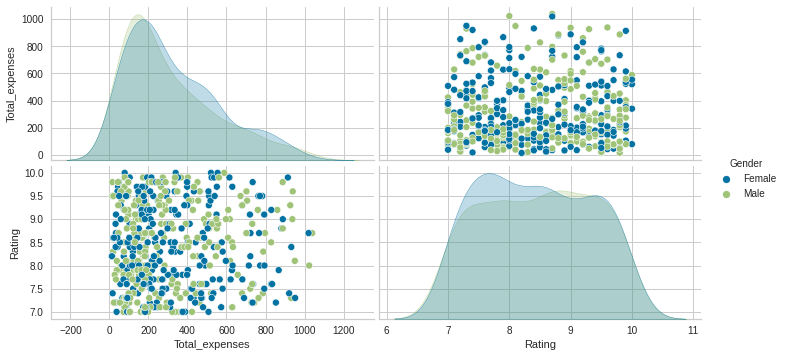

In [ ]:
sns.pairplot(df, hue='Gender', aspect=2)

**Scatterplot zu den Gesamtausgaben der Kunden und deren Bewertung**

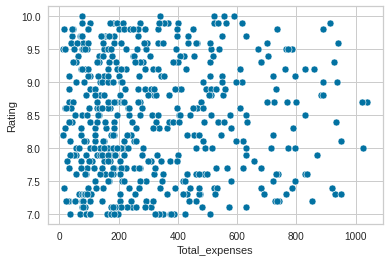

In [ ]:
sns.scatterplot(x='Total_expenses', y='Rating', data=df);

**Standardisierung der Features, damit die Werte der Variablen in einem einheitlichen Werteintervall vorliegen**

In [ ]:
X = df[['Total_expenses','Rating']] 

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

**Scatterplot mit standardisierten Axen**

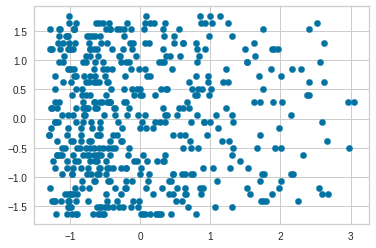

In [ ]:
plt.scatter(X_std[:, 0], X_std[:, 1], s=40);

**Elbow Point Graph um den optimalen Wert von K zu ermitteln**

K = Anzahl der Cluster, die durch den k-Means-Algorithmus gebildet werden

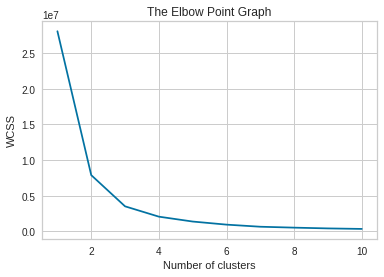

In [ ]:
wcss = [] # within-cluster sum of squares
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)  

#Plotting The Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Silhouetten Analyse um den optimalen Wert von K nochmals zu überprüfen**



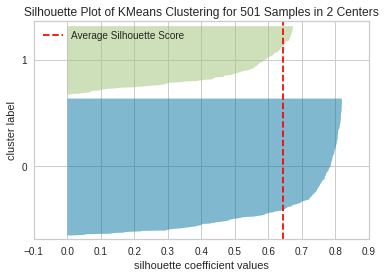

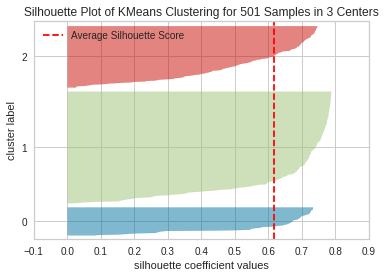

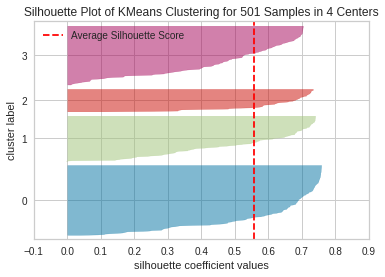

In [ ]:
X_silhouette = df[['Total_expenses','Rating']]

silhouette_score_2_cluster = 0
silhouette_score_3_cluster = 0
silhouette_score_4_clusters = 0

for i in range(2,5):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(X_silhouette)

  if(i == 2):
    silhouette_score_2_clusters = visualizer.silhouette_score_
  elif(i == 3):
    silhouette_score_3_clusters = visualizer.silhouette_score_
  else:
    silhouette_score_4_clusters = visualizer.silhouette_score_

  visualizer.show()

**Average Silhouetten Scores**

In [ ]:
print("Silhouetten Score für 2 Cluster: ",silhouette_score_2_clusters)
print("Silhouetten Score für 3 Cluster: ",silhouette_score_3_clusters)
print("Silhouetten Score für 4 Cluster: ",silhouette_score_4_clusters)

Silhouetten Score für 2 Cluster:  0.643015019137709
Silhouetten Score für 3 Cluster:  0.6166361364077588
Silhouetten Score für 4 Cluster:  0.5565847683669803


**Durchführung des k-Means-Algorithmus**

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_std)

KMeans(n_clusters=3)

In [ ]:
y_kmeans = kmeans.predict(X_std)

**Scatterplot nach Durchführung des k-Means-Algorithmus**

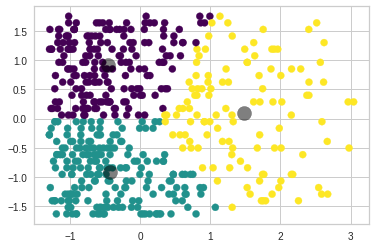

In [ ]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
df['gender_kmeans'] = y_kmeans

**Durchführung des Hierarchical Clusterings (Ward-Algorithmus)**

In [ ]:
ward = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3)
ward.fit(X_std)

AgglomerativeClustering(n_clusters=3)

**Scatterplot nach Durchführung des Ward-Algorithmus**

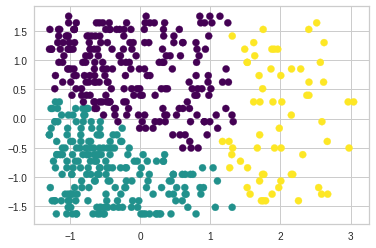

In [ ]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=ward.labels_, s=50, cmap='viridis'); 

In [ ]:
gender_ward = ward.fit_predict(X_std)

In [ ]:
df['gender_ward'] = gender_ward 

**Vergleichen der Ergebnisse der beiden Algorithmen**

In [ ]:
df['Gender'].value_counts()

Female    259
Male      242
Name: Gender, dtype: int64

**k-Means-Algorithmus**

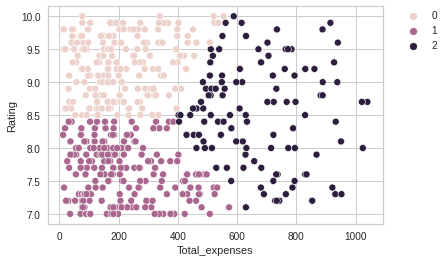

In [ ]:
sns.scatterplot(x='Total_expenses', y='Rating', hue='gender_kmeans', data=df);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.show()

In [ ]:
df['gender_kmeans'].value_counts()

1    197
0    188
2    116
Name: gender_kmeans, dtype: int64

**k-Means-Cluster mit gemischten Bewertungen und höheren Ausgaben (2)**

In [ ]:
df_kmeans_cluster_2 = df[df.gender_kmeans == 2]
kmeans_gender_occurencies_cluster_2_female = df_kmeans_cluster_2['Gender'].value_counts()['Female']
kmeans_gender_occurencies_cluster_2_male = df_kmeans_cluster_2['Gender'].value_counts()['Male']

kmeans_gender_sum_cluster_2 = kmeans_gender_occurencies_cluster_2_female + kmeans_gender_occurencies_cluster_2_male
female_proportion_kmeans_cluster_2 = round((kmeans_gender_occurencies_cluster_2_female /  kmeans_gender_sum_cluster_2) * 100, 2)
male_proportion_kmeans_cluster_2 = 100 - female_proportion_kmeans_cluster_2

print("Cluster 2:\n", "Female: ",kmeans_gender_occurencies_cluster_2_female,"\n",
      "Male: ", kmeans_gender_occurencies_cluster_2_male, "\n Anteil der Frauen: ",
      female_proportion_kmeans_cluster_2, "%", "\n Anteil der Männer: ", male_proportion_kmeans_cluster_2, "%")


Cluster 2:
 Female:  58 
 Male:  58 
 Anteil der Frauen:  50.0 % 
 Anteil der Männer:  50.0 %


**k-Means-Cluster mit besseren Bewertungen und niedrigeren Ausgaben (1)**

In [ ]:
df_kmeans_cluster_1 = df[df.gender_kmeans == 1]
kmeans_gender_occurencies_cluster_1_female = df_kmeans_cluster_1['Gender'].value_counts()['Female']
kmeans_gender_occurencies_cluster_1_male = df_kmeans_cluster_1['Gender'].value_counts()['Male']

kmeans_gender_sum_cluster_1 = kmeans_gender_occurencies_cluster_1_female + kmeans_gender_occurencies_cluster_1_male
female_proportion_kmeans_cluster_1 = round((kmeans_gender_occurencies_cluster_1_female /  kmeans_gender_sum_cluster_1) * 100, 2)
male_proportion_kmeans_cluster_1 = 100 - female_proportion_kmeans_cluster_1

print("Cluster 1:\n", "Female: ",kmeans_gender_occurencies_cluster_1_female,"\n",
      "Male: ", kmeans_gender_occurencies_cluster_1_male, "\n Anteil der Frauen: ",
      female_proportion_kmeans_cluster_1, "%", "\n Anteil der Männer: ", male_proportion_kmeans_cluster_1, "%")

Cluster 1:
 Female:  103 
 Male:  94 
 Anteil der Frauen:  52.28 % 
 Anteil der Männer:  47.72 %


**k-Means-Cluster mit schlechteren Bewertungen und niedrigeren Ausgaben (0)**

In [ ]:
df_kmeans_cluster_0 = df[df.gender_kmeans == 0]
kmeans_gender_occurencies_cluster_0_female = df_kmeans_cluster_0['Gender'].value_counts()['Female']
kmeans_gender_occurencies_cluster_0_male = df_kmeans_cluster_0['Gender'].value_counts()['Male']

kmeans_gender_sum_cluster_0 = kmeans_gender_occurencies_cluster_0_female + kmeans_gender_occurencies_cluster_0_male
female_proportion_kmeans_cluster_0 = round((kmeans_gender_occurencies_cluster_0_female /  kmeans_gender_sum_cluster_0) * 100, 2)
male_proportion_kmeans_cluster_0 = 100 - female_proportion_kmeans_cluster_0

print("Cluster 0:\n", "Female: ",kmeans_gender_occurencies_cluster_0_female,"\n",
      "Male: ", kmeans_gender_occurencies_cluster_0_male, "\n Anteil der Frauen: ",
      female_proportion_kmeans_cluster_0, "%", "\n Anteil der Männer: ", male_proportion_kmeans_cluster_0, "%")

Cluster 0:
 Female:  98 
 Male:  90 
 Anteil der Frauen:  52.13 % 
 Anteil der Männer:  47.87 %


**Geschlechter-Anteile der jeweiligen Cluster des k-Means-Algorithmus (gemessen an der Gesamtanzahl der beiden Geschlechter im Datensatz)**

In [ ]:
# Cluster 2:
overall_kmeans_female_proportion_cluster_2 = round((kmeans_gender_occurencies_cluster_2_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_kmeans_male_proportion_cluster_2 = round((kmeans_gender_occurencies_cluster_2_male / df['Gender'].value_counts()['Male']) * 100, 2)
# Cluster 1: 
overall_kmeans_female_proportion_cluster_1 = round((kmeans_gender_occurencies_cluster_1_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_kmeans_male_proportion_cluster_1 = round((kmeans_gender_occurencies_cluster_1_male / df['Gender'].value_counts()['Male']) * 100, 2)

# Cluster 0: 
overall_kmeans_female_proportion_cluster_0 = round((kmeans_gender_occurencies_cluster_0_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_kmeans_male_proportion_cluster_0 = round((kmeans_gender_occurencies_cluster_0_male / df['Gender'].value_counts()['Male']) * 100, 2)

print("Frauen: \n", "Cluster 2: ",overall_kmeans_female_proportion_cluster_2,"%","\n", "Cluster 1: ",overall_kmeans_female_proportion_cluster_1,"%", "\n", "Cluster 0: ",  overall_kmeans_female_proportion_cluster_0,"%")
print("Männer: \n", "Cluster 2: ",overall_kmeans_male_proportion_cluster_2,"%","\n", "Cluster 1: ",overall_kmeans_male_proportion_cluster_1,"%", "\n", "Cluster 0: ",  overall_kmeans_male_proportion_cluster_0,"%")

Frauen: 
 Cluster 2:  22.39 % 
 Cluster 1:  39.77 % 
 Cluster 0:  37.84 %
Männer: 
 Cluster 2:  23.97 % 
 Cluster 1:  38.84 % 
 Cluster 0:  37.19 %


**Ward-Algorithmus**

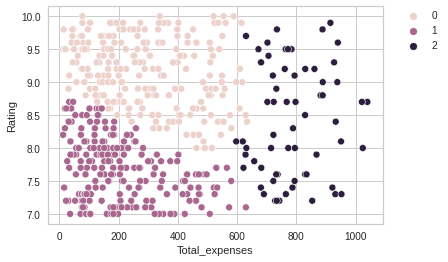

In [ ]:
sns.scatterplot(x='Total_expenses', y='Rating', hue='gender_ward', data=df);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.show()

In [ ]:
df['gender_ward'].value_counts()

0    227
1    210
2     64
Name: gender_ward, dtype: int64

**Ward-Cluster mit gemischten Bewertungen und höheren Ausgaben (2)**

In [ ]:
df_ward_cluster_2 = df[df.gender_ward == 2]
ward_gender_occurencies_cluster_2_female = df_ward_cluster_2['Gender'].value_counts()['Female']
ward_gender_occurencies_cluster_2_male = df_ward_cluster_2['Gender'].value_counts()['Male']

ward_gender_sum_cluster_2 = ward_gender_occurencies_cluster_2_female + ward_gender_occurencies_cluster_2_male
female_proportion_ward_cluster_2 = round((ward_gender_occurencies_cluster_2_female /  ward_gender_sum_cluster_2) * 100, 2)
male_proportion_ward_cluster_2 = 100 - female_proportion_ward_cluster_2

print("Cluster 2:\n", "Female: ",ward_gender_occurencies_cluster_2_female,"\n",
      "Male: ", ward_gender_occurencies_cluster_2_male, "\n Anteil der Frauen: ",
      female_proportion_ward_cluster_2, "%", "\n Anteil der Männer: ", male_proportion_ward_cluster_2, "%")

Cluster 2:
 Female:  35 
 Male:  29 
 Anteil der Frauen:  54.69 % 
 Anteil der Männer:  45.31 %


**Ward-Cluster mit schlechteren Bewertungen und niedrigeren Ausgaben (1)**

In [ ]:
df_ward_cluster_1 = df[df.gender_ward == 1]
ward_gender_occurencies_cluster_1_female = df_ward_cluster_1['Gender'].value_counts()['Female']
ward_gender_occurencies_cluster_1_male = df_ward_cluster_1['Gender'].value_counts()['Male']

ward_gender_sum_cluster_1 = ward_gender_occurencies_cluster_1_female + ward_gender_occurencies_cluster_1_male
female_proportion_ward_cluster_1 = round((ward_gender_occurencies_cluster_1_female /  ward_gender_sum_cluster_1) * 100, 2)
male_proportion_ward_cluster_1 = 100 - female_proportion_ward_cluster_1

print("\n Cluster 1:\n", "Female: ",ward_gender_occurencies_cluster_1_female,"\n",
      "Male: ", ward_gender_occurencies_cluster_1_male, "\n Anteil der Frauen: ",
      female_proportion_ward_cluster_1, "%", "\n Anteil der Männer: ", male_proportion_ward_cluster_1, "%")


 Cluster 1:
 Female:  113 
 Male:  97 
 Anteil der Frauen:  53.81 % 
 Anteil der Männer:  46.19 %


**Ward-Cluster mit besseren Bewertungen und niedrigeren Ausgaben (0)**

In [ ]:
df_ward_cluster_0 = df[df.gender_ward == 0]
ward_gender_occurencies_cluster_0_female = df_ward_cluster_0['Gender'].value_counts()['Female']
ward_gender_occurencies_cluster_0_male = df_ward_cluster_0['Gender'].value_counts()['Male']

ward_gender_sum_cluster_0 = ward_gender_occurencies_cluster_0_female + ward_gender_occurencies_cluster_0_male
female_proportion_ward_cluster_0 = round((ward_gender_occurencies_cluster_0_female /  ward_gender_sum_cluster_0) * 100, 2)
male_proportion_ward_cluster_0 = 100 - female_proportion_ward_cluster_0

print("\n Cluster 0:\n", "Female: ",ward_gender_occurencies_cluster_0_female,"\n",
      "Male: ", ward_gender_occurencies_cluster_0_male, "\n Anteil der Frauen: ",
      female_proportion_ward_cluster_0, "%", "\n Anteil der Männer: ", male_proportion_ward_cluster_0, "%")


 Cluster 0:
 Female:  111 
 Male:  116 
 Anteil der Frauen:  48.9 % 
 Anteil der Männer:  51.1 %


**Geschlechter-Anteile der jeweiligen Cluster des Ward-Algorithmus (gemessen an der Gesamtanzahl der beiden Geschlechter im Datensatz)**

In [ ]:
# Cluster 2:
overall_female_proportion_cluster_2 = round((ward_gender_occurencies_cluster_2_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_male_proportion_cluster_2 = round((ward_gender_occurencies_cluster_2_male / df['Gender'].value_counts()['Male']) * 100, 2)
# Cluster 1: 
overall_female_proportion_cluster_1 = round((ward_gender_occurencies_cluster_1_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_male_proportion_cluster_1 = round((ward_gender_occurencies_cluster_1_male / df['Gender'].value_counts()['Male']) * 100, 2)

# Cluster 0: 
overall_female_proportion_cluster_0 = round((ward_gender_occurencies_cluster_0_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_male_proportion_cluster_0 = round((ward_gender_occurencies_cluster_0_male / df['Gender'].value_counts()['Male']) * 100, 2)

print("Frauen: \n", "Cluster 2: ",overall_female_proportion_cluster_2,"%","\n", "Cluster 1: ",overall_female_proportion_cluster_1,"%", "\n", "Cluster 0: ",  overall_female_proportion_cluster_0,"%")
print("Männer: \n", "Cluster 2: ",overall_male_proportion_cluster_2,"%","\n", "Cluster 1: ",overall_male_proportion_cluster_1,"%", "\n", "Cluster 0: ",  overall_male_proportion_cluster_0,"%")

Frauen: 
 Cluster 2:  13.51 % 
 Cluster 1:  43.63 % 
 Cluster 0:  42.86 %
Männer: 
 Cluster 2:  11.98 % 
 Cluster 1:  40.08 % 
 Cluster 0:  47.93 %
